In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx = Ly = 10.0       # Initial box dimensions
temperature = 1.0    # Initial temperature
dt = 0.01            # Time step
total_time = 20.0    # Total simulation time (units)
anim_interval = 5    # Save position every N steps for animation


equilibrium_steps = 0  # Steps to discard until equilibrium
phase_change_time = 10.0  # Time to resize box


# Derived parameters
num_steps = int(total_time / dt)
phase_change_step = int(phase_change_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

# # Manually take a snapshot at time 0.0
# sim.take_snapshot()

print(f"Starting simulation with {N} particles for {num_steps} steps")
start_time = time.time()

# Step 1: Discard initial steps to reach equilibrium
print(f"Discarding first {equilibrium_steps} steps to reach equilibrium...")
for i in range(equilibrium_steps):
    sim.step()

# Step 2: Clear history after reaching equilibrium
sim.clear_history()

# Step 3: Main simulation loop
print(f"Running main simulation for {num_steps} steps...")
update_interval = max(1, num_steps // 20)  # Update every 5%

for i in range(num_steps):
    sim.step()

    # Double the temperature every 5 time units
    if i % int(5 / dt) == 0:
        sim.set_temperature(sim.temperature * 1.5)

    # Print progress updates
    if (i+1) % update_interval == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Starting simulation with 64 particles for 2000 steps
Discarding first 0 steps to reach equilibrium...
Running main simulation for 2000 steps...
Progress: 100.0% | Step: 2000/2000 | Time: 8.4s | ETA: 0.0s | T: 3.928 | P: 5.201
Simulation completed in 8.38 seconds


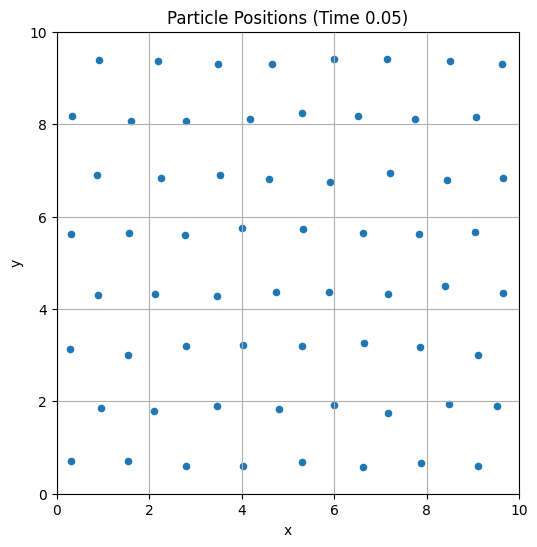

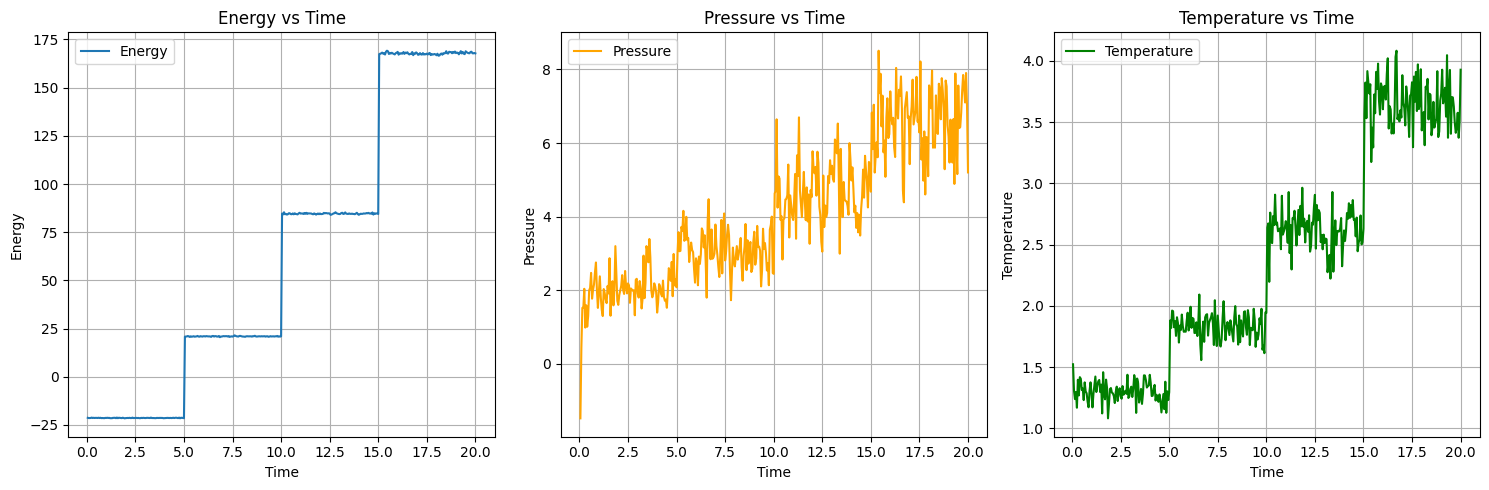

In [2]:
from LJVisualizer import LJVisualizer

# Create a visualizer
viz = LJVisualizer(sim)

viz.plot_positions(time=0.0)

viz.plot_metrics()

In [3]:
# viz.animate_positions()